# Matplotlib & Seaborn

Before getting started we import the necessary libraries we will use.
- Pandas
- Numpy
- Matplotlib Pyplot
- Seaborn

In [14]:
# import libraries to use (pandas, numpy, matplotlib.pyplot and seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline


First, as an aid, you can find cheatsheets for Matplotlib and Seaborn below:
- [Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

We will do our first plots using Matplotlib. We will do only a single plot for now with several lines.
We use NumPy to create an array of numbers from 0 to 10, that will represent the X axis.

In [4]:
# np.arange()
x = np.arange(0,10,1)

We will create arrays for the Y axis related to values of x:
- y = x*2
- y = x
- y = x/2
- y = x*3

In [6]:
#y1 = list(map(lambda x: x*2,x))
x*2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [7]:
y1 = x*2
y2 = x
y3 = x/2
y4 = x*3

Now we will create the plot. We will first create an easy plot and then we'll modify parametres.

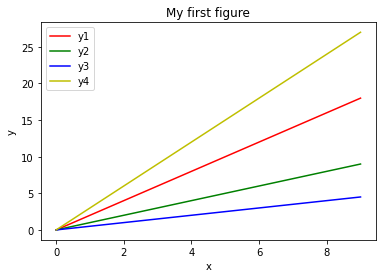

In [21]:
# create first figure and ax
# use subplots(), use the option figsize=(,) to control the figure size
fig, ax = plt.subplots()

# we add a title to the figure or the ax
# use set_title() on the axis
ax.set_title("My first figure")

# we plot the different lines
# add every plot(x, y, label=, c=) to the SAME axis with plot
ax.plot(x,y1, label="y1", c = "r") 
ax.plot(x,y2, label="y2", c = "g")
ax.plot(x,y3, label="y3", c = "b")
ax.plot(x,y4, label="y4", c = "y")
ax.set_xlabel("x")
ax.set_ylabel("y")
#ax.set_xlim(0,15) # Allows you to specify the range of value for the 'x' axis
# we add the legend
# add the legend to the axis with legend()
ax.legend()

We will do now a figure with 3 plots in a single row  (3 subplots). First we define two curves.
- y = x^2
- y = 2^x

In [19]:
y5 = x**2
y6 = 2**x

Now we will create the figure and all the axes, and will plot the lines:

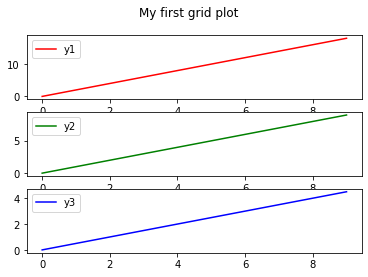

In [20]:
# create the figure and axes
# subplots(). Remeber that when you create several plots, the variable 'axis' becomes a list.
fig2, ax2 = plt.subplots(3,1)
# add an overall title for the figure
# suptitle() on the figure # p = superior 
fig2.suptitle("My first grid plot")
# create first plot (left), adding a title
# plot() and set_title()
ax2[0].plot(x,y1, label = "y1", c = "r")
# create second plot (centre), adding a title
# plot() and set_title()
ax2[1].plot(x,y2, label = "y2", c = "g")
# create third plot (right), adding a title
# plot() and set_title()
ax2[2].plot(x,y3, label = "y3", c = "b")
# set a legend
ax2[0].legend()
ax2[1].legend()
ax2[2].legend()

In [34]:
type(ax2)

numpy.ndarray

## Using Matplotlib and Seaborn with Dataframes

First we will import a dataset by executing the cells below

In [32]:
titanic = sns.load_dataset('titanic')

Count how many passengers survived and how many didn't. Use only one method. Store the result in a variable.

In [24]:
alive = titanic['alive'].value_counts()

In [27]:
alive

no     549
yes    342
Name: alive, dtype: int64

We will create now a bar chart. The procedure is the same as the first plot we created.

<AxesSubplot:title={'center':'Bar plot of survived'}, ylabel='alive'>

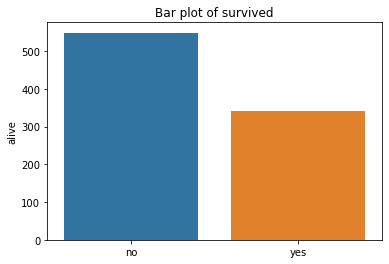

In [33]:
# create figure and axes
# subplots()
fig3, ax3 = plt.subplots()
# set title
# set_title()
ax3.set_title("Bar plot of survived")
# plot the bar chart
# bar()

sns.barplot(x=alive.index ,y =alive)

Now let's create a figure with two bar charts (axes), one above the other: 
- One chart displaying the number of men, women, and children.
- Another displaying the number of passengers by *class* (first, second and third class).

Alert: do not name a variable as *class* because this name is already being used by Python (like *list*, *dict*, etc.)

In [40]:
who = titanic['who'].value_counts()
who

man      537
woman    271
child     83
Name: who, dtype: int64

In [41]:
p_class = titanic['class'].value_counts()

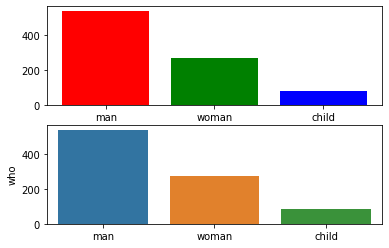

In [81]:
# create figure and axes
fig4, ax4 = plt.subplots(2,1)

# plot the bar chart
# With matplotlib
ax4[0].bar(x=who.index, height = who, color = ['r','g','b'])
#ax4[1].bar(x=p_class.index, height = p_class)

# With seaborn
sns.barplot(x = who.index, y = who)

### Seaborn (more complex graphs)

We want to know if the class of the passenger's ticket affected their chances of survival. We will introduce Seaborn now as it allow us to create more complex graphs relatively easy.

First, let's find and create a dataframe with the survival ratings by *class*.
Hint: use groupby() 
, count(), reset_index()

In [45]:
class_survival = titanic.groupby(['class','alive'])['survived'].count().reset_index()
class_survival

,class,alive,survived
0,First,no,80
1,First,yes,136
2,Second,no,97
3,Second,yes,87
4,Third,no,372
5,Third,yes,119


We now will create the bar chart with Seaborn. First we set the color palette, which means that a preset palette of colors will be used in the upcoming graphs. You can find information of Seaborn palettes in the [Official Seaborn documentation](https://seaborn.pydata.org/tutorial/color_palettes.html) or in [articles](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f).

In [46]:
sns.set_palette('RdYlGn')
palette_alive = {"yes": "C5", "no": "C0"}

And now we create the bar chart. In Seaborn we can use now the additional parameter 'hue' to create plots.

<AxesSubplot:title={'center':'Survival plot'}, xlabel='class', ylabel='survived'>

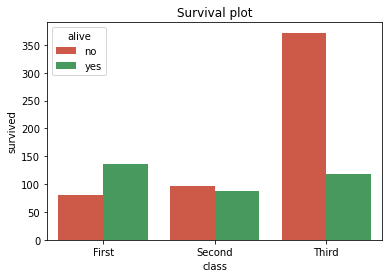

In [47]:
# Start with the usual matplotlib subplots() function
fig5, ax5 = plt.subplots()

# set the title using: set_title()
ax5.set_title("Survival plot")

# uses seaborn barplot(x, y, hue = , palette = ) function
sns.barplot(x = class_survival['class'], y = class_survival['survived'], hue = class_survival['alive'], palette= palette_alive)

As a final challenge, we will create another FacetGrid with catplot but instead of bars we will plot **boxes** (a box plot is very useful if you want to see at a first glance the relevant statistics of a distribution). 

We want to plot the following:

- In each ax we will plot the distribution of *ages* according to their *sex* (two boxplots per subplot).
- Each FacetGrid column will define a filter according to the passengers' *class*. (The FacetGrid will then have three subplots).

*Hint*: You can use the *titanic* DataFrame without any further modification.

**Bonus track**: If you feel confortable you can also add a *row* conditition that will filter the plots according to the *alone* column (whether the passenger embarked with any relatives). In this case the FacetGrid will become a 2x3 matrix of subplots.

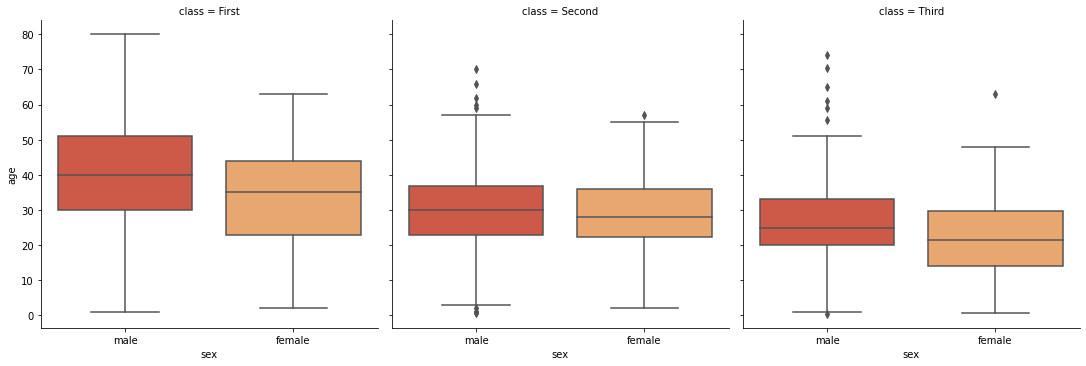

In [65]:
# sns.catplot(). plot sex on x axis, Age on y axis, col = 'class', kind = "box", margin_titles = True. sns.catplot() returns a figure
# use set_xticklabels(['Male', 'Female'])
# set_xlabels() to ""
# set_ylabels() to "Age"
grouped = titanic.groupby(['class','age'])['alive'].count().rename('count').reset_index()
grouped
sns.catplot(x='sex', y='age', col = 'class', data = titanic, kind= "box")

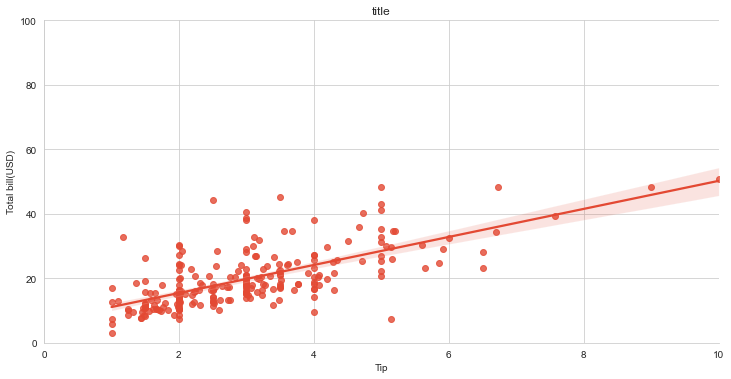

In [68]:
tips = sns.load_dataset("tips")
sns.set_style("whitegrid")
g = sns.lmplot(x="tip", y="total_bill",data=tips, aspect=2)
g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)))
plt.title("title")
plt.show(g)